# Memprediksi dan Menganalisis Penjualan Barang Terlaris Menggunakan Metode Naive Bayes dan K-Means

# Disusun Oleh:
Nama : Muhamad Azriel Yanuar

Nim : A11.2022.14646

Kelas : Pembelajaran Mesin A11.2022.14646

# Ringkasan

Penelitian ini bertujuan untuk menganalisis dan memprediksi penjualan barang terlaris menggunakan dua metode pembelajaran mesin: Naive Bayes dan K-Means. Dengan memanfaatkan dataset penjualan hijab, penelitian ini berfokus pada identifikasi barang yang paling laris serta memprediksi barang yang kemungkinan besar akan menjadi laris di bulan berikutnya.

Penelitian ini menggunakan dataset penjualan yang berisi informasi tentang berbagai barang hijab, termasuk tanggal penjualan, kode barang, nama barang, kategori, desain, harga jual, harga beli, dan laba. Dua algoritma pembelajaran mesin diterapkan dalam penelitian ini:

1. Naive Bayes: Digunakan untuk memprediksi barang yang akan terjual berdasarkan fitur seperti kode barang dan bulan penjualan.
2. K-Means: Digunakan untuk mengelompokkan barang-barang berdasarkan pola penjualan untuk mengidentifikasi kelompok barang yang memiliki pola penjualan serupa.

# Masalah dan Tujuan Penelitian

Masalah dan Tujuan Penelitian

Masalah

Di dalam industri retail, memahami pola penjualan dan mampu memprediksi barang-barang yang akan terjual dengan baik di masa depan adalah tantangan yang signifikan. Tanpa prediksi yang akurat, perusahaan mungkin menghadapi masalah seperti kelebihan stok untuk barang yang kurang diminati atau kekurangan stok untuk barang yang sangat diminati. Masalah ini dapat menyebabkan kerugian finansial, ketidakpuasan pelanggan, dan inefisiensi operasional. Oleh karena itu, diperlukan metode yang efektif untuk menganalisis data penjualan historis dan membuat prediksi yang akurat tentang barang-barang yang akan terlaris di bulan berikutnya.

Tujuan

Penelitian ini bertujuan untuk mengatasi masalah tersebut dengan mengaplikasikan dua metode pembelajaran mesin, yaitu Naive Bayes dan K-Means, untuk menganalisis dan memprediksi penjualan barang terlaris. Secara khusus, tujuan dari penelitian ini adalah:

1. Memprediksi Barang Terlaris:

Menggunakan algoritma Naive Bayes untuk memprediksi barang-barang yang kemungkinan besar akan menjadi terlaris di bulan berikutnya berdasarkan data penjualan historis.

2. Mengelompokkan Barang Berdasarkan Pola Penjualan:

Menggunakan algoritma K-Means untuk mengelompokkan barang-barang ke dalam beberapa kelompok berdasarkan pola penjualan mereka. Ini membantu dalam mengidentifikasi strategi penjualan yang berbeda untuk setiap kelompok.

3. Mengevaluasi dan Membandingkan Performa Metode:

Mengevaluasi akurasi prediksi dari Naive Bayes menggunakan metrik akurasi, matriks kebingungan, dan laporan klasifikasi.
Mengevaluasi hasil pengelompokan K-Means menggunakan skor siluet sebagai proxy untuk akurasi.
Membandingkan hasil dari kedua metode untuk menentukan mana yang lebih efektif dalam konteks prediksi penjualan barang terlaris.

4. Visualisasi Hasil:

Membuat visualisasi yang informatif untuk menampilkan prediksi barang terlaris bulan depan dan perbandingan antara hasil dari Naive Bayes dan K-Means.

# Mengimport Libraries

- pandas dan numpy : untuk manipulasi data.
- matplotlib.pyplot dan seaborn : untuk visualisasi data.
- sklearn :  untuk algoritma machine learning, pemisahan data, dan evaluasi model.
- collections.Counter : untuk menghitung kemunculan elemen dalam daftar.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter

# Penjelasan Dataset

# Exploratory Data Analysis (EDA)

# 1. Memuat/Memanggil Dataset

Memanggil Dataset

In [8]:
filelocation = '../uas_ml/dataset/dataset_hijab.xlsx'
df_jual = pd.read_excel(filelocation, sheet_name='laporan penjualan', skiprows=3)

# 2. Deskripsi dataset

Melihat Dataset

In [10]:
df_jual

,NO,TANGGAL,KODE,NAMA BARANG,KATEGORI,DESAIN,HARGA JUAL,HARGA BELI,LABA
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2024-02-01,H-01,PASMINA OVAL,HIJAB,POLOS,120000.0,140000.0,20000.0
2,2.0,2024-02-01,H-25,SEGIEMPAT PARIS,HIJAB,POLOS,70000.0,90000.0,20000.0
3,3.0,2024-02-01,H-21,SEGIEMPAT VOAL,HIJAB,POLOS,30000.0,45000.0,15000.0
4,4.0,2024-02-01,H-05,PASMINA SHIMMER SILK,HIJAB,POLOS,80000.0,100000.0,20000.0
...,...,...,...,...,...,...,...,...,...
465,465.0,2024-02-16,H-18,BERGO INSTAN VOAL,HIJAB,POLOS,70000.0,90000.0,20000.0
466,466.0,2024-02-16,H-02,PASMINA SILK LASERCUT,HIJAB,POLOS,115000.0,130000.0,15000.0
467,467.0,2024-02-16,H-04,PASMINA CERUTY,HIJAB,BORDIR,110000.0,125000.0,15000.0
468,468.0,2024-02-16,H-05,PASMINA SHIMMER SILK,HIJAB,POLOS,80000.0,100000.0,20000.0


# 3. Mengganti nama kolom

Dalam hal ini, nama kolom tidak diubah, namun ditulis ulang untuk memastikan semua kolom yang diperlukan telah diidentifikasi dengan benar.

In [12]:
df_jual = df_jual.rename(columns={
    'NO': 'NO',
    'TANGGAL': 'TANGGAL',
    'KODE': 'KODE',
    'NAMA BARANG': 'NAMA BARANG',
    'KATEGORI': 'KATEGORI',
    'DESAIN': 'DESAIN',
    'HARGA JUAL': 'HARGA JUAL',
    'HARGA BELI': 'HARGA BELI',
    'LABA': 'LABA'
})

# 4. Menghilangkan Baris tidak terdeteksi

menghapus baris yang memiliki nilai NO yang hilang (NaN). dropna(subset=['NO']) memastikan bahwa hanya baris dengan nilai NO yang lengkap yang akan dipertahankan dalam dataset.

In [13]:
df_jual = df_jual.dropna(subset=['NO'])

# 5. menampilkan dataset yang sudah diubah

In [14]:
df_jual

,NO,TANGGAL,KODE,NAMA BARANG,KATEGORI,DESAIN,HARGA JUAL,HARGA BELI,LABA
1,1.0,2024-02-01,H-01,PASMINA OVAL,HIJAB,POLOS,120000.0,140000.0,20000.0
2,2.0,2024-02-01,H-25,SEGIEMPAT PARIS,HIJAB,POLOS,70000.0,90000.0,20000.0
3,3.0,2024-02-01,H-21,SEGIEMPAT VOAL,HIJAB,POLOS,30000.0,45000.0,15000.0
4,4.0,2024-02-01,H-05,PASMINA SHIMMER SILK,HIJAB,POLOS,80000.0,100000.0,20000.0
5,5.0,2024-02-01,H-04,PASMINA CERUTY,HIJAB,BORDIR,110000.0,125000.0,15000.0
...,...,...,...,...,...,...,...,...,...
465,465.0,2024-02-16,H-18,BERGO INSTAN VOAL,HIJAB,POLOS,70000.0,90000.0,20000.0
466,466.0,2024-02-16,H-02,PASMINA SILK LASERCUT,HIJAB,POLOS,115000.0,130000.0,15000.0
467,467.0,2024-02-16,H-04,PASMINA CERUTY,HIJAB,BORDIR,110000.0,125000.0,15000.0
468,468.0,2024-02-16,H-05,PASMINA SHIMMER SILK,HIJAB,POLOS,80000.0,100000.0,20000.0


# 6. Menganalisi menggunakan Bulan

mengonversi kolom TANGGAL menjadi format datetime dan mengekstrak bulan dari tanggal tersebut. Bulan yang diekstrak disimpan dalam kolom baru BULAN.

In [16]:
df_jual['TANGGAL'] = pd.to_datetime(df_jual['TANGGAL'])
df_jual['BULAN'] = df_jual['TANGGAL'].dt.month

# 7. Menambah Tabel jumlah yang di beli

In [26]:
df_laris = df_jual.groupby(['KODE', 'NAMA BARANG']).size().reset_index(name='COUNT')
df_laris = df_laris.sort_values(by='COUNT', ascending=False)

In [27]:
top_10_laris = df_laris.head(10)
print("Top 10 Barang Terlaris:")
print(top_10_laris)


Top 10 Barang Terlaris:
    KODE          NAMA BARANG  COUNT
35  H-30     SEGITIGA DIAMOND     46
0   A-01               PENITI     37
1   A-02               CHIPUT     37
24  H-18    BERGO INSTAN VOAL     36
7   H-01         PASMINA OVAL     32
27  H-21       SEGIEMPAT VOAL     27
17  H-11        PASMINA VOAL      22
32  H-27        SEGITIGA VOAL     15
15  H-09  PASMINA SNOWCHIFFON     14
25  H-19   BERGO INSTAN CREPE     13


# 8. Data Exploration

melakukan eksplorasi data:

- describe : memberikan statistik deskriptif dari dataset.
- info : memberikan informasi tentang tipe data dan jumlah nilai non-null.
- sns.countplot = digunakan untuk membuat plot distribusi penjualan per bulan.


Deskripsi Data:
               NO                        TANGGAL     HARGA JUAL  \
count  469.000000                            469     469.000000   
mean   235.000000  2024-02-08 06:36:04.605543680   61731.343284   
min      1.000000            2024-02-01 00:00:00    4000.000000   
25%    118.000000            2024-02-04 00:00:00   30000.000000   
50%    235.000000            2024-02-08 00:00:00   60000.000000   
75%    352.000000            2024-02-12 00:00:00   80000.000000   
max    469.000000            2024-02-16 00:00:00  130000.000000   
std    135.532899                            NaN   37209.563300   

          HARGA BELI          LABA  BULAN  
count     469.000000    469.000000  469.0  
mean    76503.198294  14771.855011    2.0  
min      5000.000000   1000.000000    2.0  
25%     40000.000000  10000.000000    2.0  
50%     80000.000000  15000.000000    2.0  
75%    100000.000000  20000.000000    2.0  
max    150000.000000  20000.000000    2.0  
std     41617.028001   5603

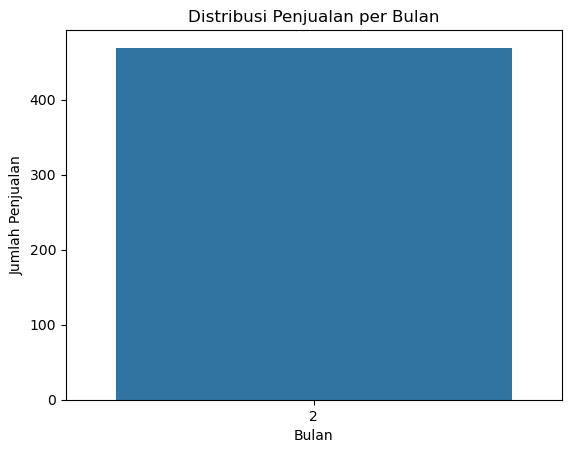

In [29]:
print("\nDeskripsi Data:")
print(df_jual.describe())

print("\nInformasi Data:")
print(df_jual.info())

print("\nDistribusi Penjualan per Bulan:")
sns.countplot(x='BULAN', data=df_jual)
plt.title('Distribusi Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.show()